![Astrofisica Computacional](../logo.png)

---
## 03. Logistic Regression Algorithm.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we implement a Logistic regression algorithm to classify a dataset.

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

original_data = pd.read_csv("object_classification.csv")
original_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


### The data



In [2]:
df = original_data[['u','g','r','i','z','redshift','class']][original_data['class']!='QSO']
df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


In [3]:
outlier = df.query('u < 0 or g < 0 or r < 0 or i < 0 or z < 0')
outlier

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


In [4]:
df = df.drop(79543)
df['classInt'] = df['class'].replace(['STAR', 'GALAXY'],[0, 1])
df

,u,g,r,i,z,redshift,class,classInt
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,1
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,1
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,1
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,1
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,1
...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY,1
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY,1
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY,1
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY,1


In [9]:
Xdf = np.asarray(df[['u','g','r','i','z','redshift']])
ydf = np.asarray(df[['classInt']])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=413, test_size=0.2)

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (64830, 6)
Shape of Y_train :  (64830, 1)
Shape of X_test :  (16208, 6)
Shape of Y_test :  (16208, 1)


### Logistic Regression


For logistic regression (and binary classification) we use a fit function with the form

\begin{equation}
y_p (x;W,b) = \sigma (z(x;W,b)) 
\end{equation}

where $\sigma (z)$ represents the sigmoid (logistic) function,

\begin{equation}
\sigma (z) = \frac{1}{1+e^{-z}} 
\end{equation}

and $z(x;W,b) = Wx + b$. Therefore, we have

\begin{equation}
y_p (x;W,b) = \frac{1}{1+e^{-(Wx + b)}}. 
\end{equation}

Since the result of the regression will be a binary classification, with values 0 or 1, the cost function cannot have the form

\begin{equation}
f_{c} = \frac{1}{n} \sum_{i=1}^n \left( y_{p}(x_i) - y_i \right)^2.
\end{equation}

Instead, we will use a cost function defined as

\begin{equation}
f_{c} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(y_p) + (1-y_i)\log (1-y_p) \right].
\end{equation}

Note that, from this cost function, we conclude that:

- For a sigle sample with target value $y_i = 0$, the cost function reduces to $f_{c} = - \log (1-y_p)$. Note that a prediction near $y_p \sim 1$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction near $y_p \sim y_0 = 0$ gives a low cost, $f_c \rightarrow 0$.

- For a sigle sample with target value $y_i = 1$, the cost function reduces to $f_{c} = - \log (y_p)$. This time, a prediction of $y_p \sim 0$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction of $y_p \sim y_0 = 1$ gives a low cost, $f_c \rightarrow 0$.


The gradient of the cost function, w.r.t. the parameters $W$ and $b$ give
\begin{align}
\frac{ \partial f_{c}}{\partial W} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial W} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial W} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p) x_i \right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] x_i\\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] x_i\\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right] x_i.
\end{align}

and 

\begin{align}
\frac{ \partial f_{c}}{\partial b} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial b} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial b} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p)\right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] \\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right].
\end{align}


In [57]:
class LogisticRegression():
    '''
    Logistic regression class
    '''
    def __init__(self):
        pass
    
    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def Z(self, X):
        '''
        Function to fit
        '''
        return self.b + np.dot(X,self.W)
    
    def predict(self, X):
        return self.sigmoid(self.Z(X))
    
    def cost(self, X, y):
        '''
        Cost function
        '''
        Yp = self.predict(X)
        return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
    
    def grad_cost(self, X,y):
        '''
        Gradient of the cost function
        '''
        Yp = self.predict(X)
        grad_dW = (1/self.n)*np.dot(X.T, Yp-y)
        grad_db = (1/self.n)*np.sum(Yp-y)
        return grad_dW, grad_db
    
    def fit(self, X, y):
        '''
        Optimization function
        '''
        alpha= 0.009  # Learning rate
        tol = 1e-10    # Tolerance
        np.random.seed(413)
        self.m = X.shape[1] # Number of features
        self.n = X.shape[0] # Number od samples
        
        self.W = np.zeros([self.m,1])#np.random.rand(self.m)
        self.b = 0#np.random.rand(1)
        Y = self.sigmoid(self.Z(X))

        self.history = []
        self.history.append(self.cost(X, y))
        print('Initial cost = ', self.history[0])
        
        epoch = 0 # Epochs
        epsilon = 1
        while epsilon>tol and epoch<70000:
            # Gradient
            grad_dW, grad_db = self.grad_cost(X,y)

            self.W = self.W - alpha*grad_dW
            self.b = self.b - alpha*grad_db
            
            self.history.append(self.cost(X, y))
            epsilon = abs(self.history[epoch] - self.history[epoch+1])
            epoch +=1
        
        print('Final cost = ', self.history[-1])
        print('Number of epochs = ',epoch)
    
    def accuracy(self, X, y):
        Yp = self.predict(X)
        Yp = Yp > 0.5
        Yp = np.array(Yp, dtype = 'int64')
        acc = (1 - np.sum(abs(Yp - y))/len(y))*100
        print("Accuracy of the model is : ", round(acc, 2), "%")
        
    

In [58]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

W, b = lr.W, lr.b

print('\nThe optimized parameters are')
print('W = ',W)
print('b = ',b)

Initial cost =  0.6931471805599453
Final cost =  0.2107235921284471
Number of epochs =  70000

The optimized parameters are
W =  [[-0.01704925]
 [ 0.71659895]
 [-1.04012704]
 [ 0.33783841]
 [-0.18867771]
 [11.12621726]]
b =  2.3090981256979695


In [59]:
lr.accuracy(X_test, y_test)


Accuracy of the model is :  96.09 %


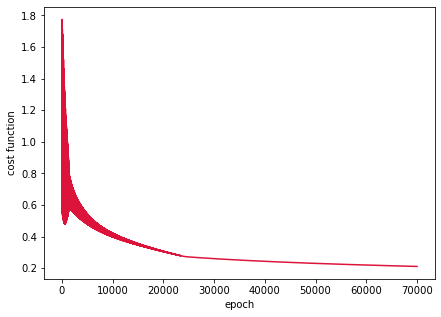

In [60]:
# Plot Training history

plt.figure(figsize=(7,5))
plt.plot(lr.history, color='crimson')
#plt.plot(lr.history[0:100], color='crimson')
plt.ylabel(r'cost function')
plt.xlabel(r'epoch')
plt.show()

In [76]:
prediction = lr.predict(X_test)
prediction = prediction >0.5
prediction = np.array(prediction, dtype = 'int64')

confusion_matrix(y_test, prediction, normalize='all')

array([[0.25913129, 0.005923  ],
       [0.03319348, 0.70175222]])

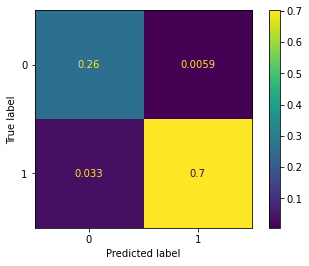

In [79]:
cm = confusion_matrix(y_test, prediction, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()